# Development Version

Concept: 
- Update Stage 1 questions
- A couple Time series questions
- New exploration to see if average annual temperature is a predictor of participation and medals (join tables)
- Add in population, athletes per 1 million. Liechtenstein tops out over 8000 athletes per million (divide table columns after join).
- What about annual snowfall by country?
- What about highest peak?

## Olympics Data mini-project
*Temple Elements of Data Science*<br>
In this mini-project you will draw on your new found skills from Module 1 of the course, Have Fun!
The description of the mini-project and it's goals is given [here](Olympic_Lab_Mini_project.pdf)

In [ ]:
# Enter your name as a string
name = ...

In [1]:
# Extra Python functionality to import
from datascience import *  # datascience Table 
import EDS
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
user = os.getenv('JUPYTERHUB_USER')

### Data Sets
Athletes: Olympic_Data/athlete_events.csv
Source: Kaggle https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [2]:
datafile = "Olympic_Data/winter_athletes.csv"
athletes = Table.read_table(datafile).sort("Year",descending=True).where("Season","Winter")
athletes

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
16,Juhamatti Tapio Aaltonen,M,28,184,85,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
126,Forough Abbasi,F,20,164,58,Iran,IRI,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Slalom,nan
145,Jeremy Abbott,M,28,175,70,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Men's Singles,nan
145,Jeremy Abbott,M,28,175,70,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze
463,Agnese boltia,F,17,166,60,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Super G,nan
463,Agnese boltia,F,17,166,60,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Giant Slalom,nan
463,Agnese boltia,F,17,166,60,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Slalom,nan
532,Iason Abramashvili,M,25,176,82,Georgia,GEO,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Giant Slalom,nan
532,Iason Abramashvili,M,25,176,82,Georgia,GEO,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Slalom,nan
534,Oleksandr Volodymyrovych Abramenko,M,25,180,82,Ukraine,UKR,2014 Winter,2014,Winter,Sochi,Freestyle Skiing,Freestyle Skiing Men's Aerials,nan


In [3]:
athletes.group("Name", np.average).num_rows

18923

In [4]:
athletes.num_rows

48564

## Mini-Project
Now develop your project to address goals given in the [linked document](Olympic_Lab_Mini_project.pdf). Add lines of code and maarkdown as needed below. Feel free to expand the project to explore ideas of interest.

In [5]:
athletes.group("Team")

Team,count
Albania,7
Algeria,12
American Samoa,2
Andorra,116
Argentina,370
Argentina-1,7
Argentina-2,7
Armenia,47
Australia,537
Australia-1,5


### Average Annual Country Temperature: Expectation colder countries have more winter athletes and medals

In [8]:
temp = Table().read_table("temp_per_country.csv")
temp

year,country,avg,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
1753,Åland,5.11833,-2.412,-3.273,0.71,2.778,6.226,11.102,15.159,15.786,12.106,8.756,2.248,-7.766
1753,Albania,12.557,1.4,2.655,8.505,11.541,16.642,22.098,23.532,21.77,18.7,13.661,7.593,2.587
1753,Andorra,11.2345,0.938,4.083,8.352,9.165,13.783,19.796,21.148,18.796,16.546,11.706,5.991,4.51
1753,Austria,6.13892,-6.398,-3.537,2.681,6.498,11.331,16.209,16.881,14.751,12.34,7.072,-0.011,-4.15
1753,Belarus,5.65175,-7.122,-6.956,0.706,6.768,13.06,16.615,18.032,16.501,12.448,6.84,0.024,-9.095
1753,Belgium,9.45708,-1.215,2.443,6.838,8.826,13.042,17.602,18.072,16.203,14.761,10.332,4.143,2.438
1753,Bosnia And Herzegovina,10.3656,-1.973,0.043,6.558,10.293,15.253,20.463,21.589,19.567,16.607,11.343,4.776,-0.132
1753,Bulgaria,10.3995,-1.841,-0.883,5.889,10.043,15.723,20.69,22.084,20.446,17.03,11.668,5.201,-1.256
1753,Croatia,11.2875,-1.311,1.012,7.5,11.318,16.33,21.666,22.721,20.52,17.527,12.113,5.342,0.712
1753,Czech Republic,7.49492,-4.72,-2.339,3.956,8.117,12.84,17.184,18.175,16.392,13.701,8.464,1.475,-3.306


In [44]:
temp.where('country','Denmark') # Denmark is really low and must therefore include Greenland

year,country,avg
1900,Denmark,-17.7674
1901,Denmark,-18.0018
1902,Denmark,-18.3994
1903,Denmark,-18.5998
1904,Denmark,-18.87
1905,Denmark,-18.1641
1906,Denmark,-19.252
1907,Denmark,-19.0939
1908,Denmark,-17.7772
1909,Denmark,-18.4159


In [26]:
temp = temp.select('year', 'country', 'avg').where('year',are.above(1899))
temp

year,country,avg
1900,Åland,4.54783
1900,Afghanistan,13.7493
1900,Africa,23.9915
1900,Albania,13.0686
1900,Algeria,22.8642
1900,American Samoa,26.2735
1900,Andorra,11.3483
1900,Angola,21.7899
1900,Anguilla,26.4067
1900,Antigua And Barbuda,26.2299


In [40]:
avg_temp = temp.group("country",np.mean).drop("year mean")
avg_temp.sort('avg mean')

country,avg mean
Greenland,-18.2021
Denmark,-17.6707
Svalbard And Jan Mayen,-7.08485
Russia,-5.18475
Canada,-4.76418
Mongolia,-0.533983
Norway,0.460607
South Georgia And The South Sandwich Isla,1.436
Finland,1.65448
Iceland,1.76946


In [58]:
avg_temp.to_csv('Country_avg_temp.csv')

### Edit externally to update Denmark from Denmark (Europe)

In [60]:
Country_avg_temp = Table().read_table('Country_avg_temp.csv')
Country_avg_temp

country,avg mean
Afghanistan,14.2122
Africa,24.2366
Albania,12.8735
Algeria,23.2553
American Samoa,26.7148
Andorra,11.4572
Angola,21.9591
Anguilla,26.8082
Antigua And Barbuda,26.6349
Argentina,14.817


In [57]:
Denmark = Table().read_table("Denmark_temp.csv")
Denmark['Annual Mean'].mean()

8.1126229508196719

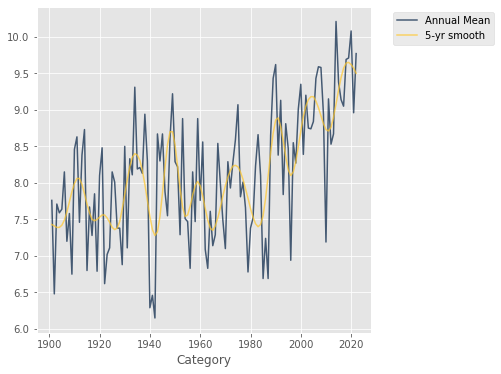

In [56]:
Denmark.plot('Category')

### Country population: Expectation countries with larrger populations have more athletes.

In [6]:
pop = Table().read_table("Country_population.csv", skiprows=3)
pop

Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,59291,59522,59471,59330,59106,58816,58855,59365,60028,60715,61193,61465,61738,62006,62267,62614,63116,63683,64174,64478,64553,64450,64332,64596,65712,67864,70192,72360,74710,77050,79417,81858,84355,86867,89101,90691,91781,92701,93540,94483,95606,96787,97996,99212,100341,101288,102112,102880,103594,104257,104874,105439,105962,106442,106585,106537,106445,nan
Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1.30693e+08,1.34169e+08,1.37836e+08,1.41631e+08,1.45606e+08,1.49742e+08,1.53956e+08,1.58313e+08,1.62875e+08,1.67596e+08,1.72476e+08,1.77503e+08,1.82599e+08,1.87902e+08,1.93513e+08,1.99284e+08,2.05203e+08,2.11121e+08,2.17481e+08,2.24316e+08,2.30968e+08,2.37937e+08,2.45387e+08,2.5278e+08,2.60209e+08,2.67938e+08,2.76036e+08,2.8449e+08,2.92795e+08,3.01125e+08,3.09891e+08,3.18544e+08,3.26934e+08,3.35625e+08,3.44418e+08,3.53467e+08,3.62986e+08,3.72352e+08,3.81716e+08,3.91486e+08,4.01601e+08,4.12002e+08,4.22741e+08,4.33807e+08,4.45282e+08,4.57154e+08,4.69509e+08,4.82406e+08,4.95749e+08,5.0941e+08,5.2346e+08,5.37793e+08,5.52531e+08,5.67892e+08,5.83651e+08,6.00008e+08,6.16378e+08,6.32747e+08,6.49757e+08,6.67243e+08,6.85113e+08,7.02977e+08,7.20859e+08,nan
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.62247e+06,8.79014e+06,8.96905e+06,9.15746e+06,9.35551e+06,9.56515e+06,9.78315e+06,1.001e+07,1.02478e+07,1.04945e+07,1.0753e+07,1.10159e+07,1.12868e+07,1.15753e+07,1.18699e+07,1.21574e+07,1.24253e+07,1.26873e+07,1.29389e+07,1.29864e+07,1.24866e+07,1.11552e+07,1.00883e+07,9.95145e+06,1.02437e+07,1.05122e+07,1.04484e+07,1.03228e+07,1.03835e+07,1.06732e+07,1.06948e+07,1.07452e+07,1.20574e+07,1.40038e+07,1.54556e+07,1.64189e+07,1.71066e+07,1.77888e+07,1.84931e+07,1.92628e+07,1.9543e+07,1.96886e+07,2.10003e+07,2.26451e+07,2.35536e+07,2.44112e+07,2.54429e+07,2.59033e+07,2.64272e+07,2.73853e+07,2.81897e+07,2.92492e+07,3.04665e+07,3.15412e+07,3.27162e+07,3.37535e+07,3.46362e+07,3.56434e+07,3.66868e+07,3.77695e+07,3.89722e+07,4.00995e+07,4.11288e+07,nan
Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,9.72563e+07,9.9314e+07,1.01445e+08,1.03668e+08,1.0596e+08,1.08336e+08,1.10798e+08,1.1332e+08,1.15922e+08,1.18616e+08,1.21425e+08,1.24336e+08,1.27364e+08,1.30563e+08,1.33954e+08,1.37549e+08,1.41258e+08,1.45123e+08,1.49207e+08,1.5346e+08,1.57826e+08,1.62323e+08,1.67023e+08,1.71567e+08,1.76054e+08,1.80817e+08,1.8572e+08,1.9076e+08,1.9597e+08,2.01392e+08,2.06739e+08,2.12173e+08,2.17966e+08,2.23789e+08,2.29676e+08,2.35861e+08,2.422e+08,2.48713e+08,2.55483e+08,2.62397e+08,2.69612e+08,2.7716e+08,2.84952e+08,2.92978e+08,3.01265e+08,3.09825e+08,3.18601e+08,3.27613e+08,3.36894e+08,3.46475e+08,3.56338e+08,3.66489e+08,3.76798e+08,3.87205e+08,3.97856e+08,4.0869e+08,4.19778e+08,4.31139e+08,4.42647e+08,4.54306e+08,4.66189e+08,4.78186e+08,4.90331e+08,nan
Angola,AGO,"Population, total",SP.POP.TOTL,5.3572e+06,5.44133e+06,5.5214e+06,5.59983e+06,5.6732e+06,5.73658e+06,5.78704e+06,5.8275e+06,5.8682e+06,5.92839e+06,6.0297e+06,6.17705e+06,6.36473e+06,6.57823e+06,6.80249e+06,7.03271e+06,7.26678e+06,7.5119e+06,7.77159e+06,8.04322e+06,8.33005e+06,8.63146e+06,8.94715e+06,9.27671e+06,9.6177e+06,9.97062e+06,1.03326e+07,1.06941e+07,1.10603e+07,1.14395e+07,1.18286e+07,1.22287e+07,1.26325e+07,1.30383e+07,1.3462e+07,1.39123e+07,1.43834e+07,1.48711e+07,1.53669e+07,1.58708e+07,1.63941e+07,1.69416e+07,1.75161e+07,1.81243e+07,1.87711e+07,1.9451e+07,2.01623e+07,2.09097e+07,2.16915e+07,2.25077e+07,2.33642e+07,2.42591e+07,2.51883e+07,2.6147e+07,2.71283e+07,2.81277e+07,2.91547e+07,3.02086e+07,3.12735e+07,3.23

### International Monetary Fund Data
Temperature Change

In [48]:
IMF_temp = Table().read_table('Annual_Surface_Temperature_Change.csv')
IMF_temp=IMF_temp.drop('ObjectId', 'ISO2','ISO3','Unit','Source', 'CTS_Code','CTS_Name','CTS_Full_Descriptor','Indicator')

In [52]:
IMF_temp





Country,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,F1971,F1972,F1973,F1974,F1975,F1976,F1977,F1978,F1979,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,F1988,F1989,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,0.619,-1.124,0.232,-0.489,-0.445,-0.286,0.513,0.129,0.361,0.6,0.483,-0.346,0.164,0.145,0.283,-0.141,0.391,0.919,-0.205,0.73,-0.168,-0.294,0.22,0.43,0.359,-0.116,0.471,0.675,1.198,0.993,1.311,1.365,0.587,1.373,0.401,1.72,0.675,0.704,0.895,1.613,1.397,0.223,1.281,0.456,1.093,1.555,1.54,1.544,0.91,0.498,1.327,2.012
Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,-0.195,-0.069,-0.288,-0.139,-0.211,-0.683,0.545,-0.814,0.203,-0.414,-0.351,0.173,-0.128,-0.27,-0.103,0.569,-0.106,0.37,-0.066,0.795,-0.269,0.106,0.076,1.33,-0.172,-0.038,0.075,0.795,0.67,1.065,1.532,0.492,0.97,0.444,0.189,0.345,1.316,0.978,0.91,1.191,1.055,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
Algeria,0.164,0.114,0.077,0.25,-0.1,0.433,-0.026,-0.067,0.291,0.116,-0.385,-0.348,-0.015,-0.503,-0.539,-0.782,0.504,0.012,0.654,0.232,0.215,0.399,0.56,-0.004,0.508,0.296,0.975,1.304,0.386,1.266,0.031,-0.312,0.552,0.732,0.595,0.846,1.059,1.109,1.476,0.82,1.856,1.258,1.585,0.988,1.264,1.395,1.22,1.185,0.945,2.265,1.398,1.147,1.192,1.69,1.121,1.757,1.512,1.21,1.115,1.926,2.33,1.688
American Samoa,0.079,-0.042,0.169,-0.14,-0.562,0.181,-0.368,-0.187,0.132,-0.047,-0.477,-0.067,0.33,-0.308,-0.118,-0.177,0.156,0.092,0.341,0.35,0.179,0.28,0.313,0.277,0.256,0.394,0.354,0.509,0.143,0.497,0.641,0.344,-0.069,0.189,0.755,0.784,nan,nan,0.242,0.626,0.904,1.152,0.716,0.191,0.801,0.403,1.032,0.67,nan,1.311,0.854,0.924,1.257,1.17,1.009,1.539,1.435,1.189,1.539,1.43,1.268,1.256
"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.49,0.415,0.637,0.018,-0.137,0.121,-0.326,-0.499,0.025,-0.371,0.246,-0.045,-0.093,-0.163,0.058,-0.188,0.178,1.044,0.859,-0.157,0.059,0.387,0.397,0.883,1.162,1.736,0.231,0.386,0.174,1.508,1.279,0.57,1.788,1.018,1.055,1.05,1.48,0.835,1.949,0.936,0.851,1.485,1.024,0.946,1.413,0.471,1.677,1.265,0.831,1.946,1.69,1.99,1.925,1.919,1.964,2.562,1.533,3.243
Angola,0.041,-0.152,-0.19,-0.229,-0.196,0.175,-0.081,-0.193,0.188,0.248,-0.097,-0.035,0.475,-0.158,-0.029,-0.313,0.272,0.037,0.291,0.279,-0.071,0.164,0.487,0.631,0.694,0.176,0.689,0.572,-0.055,0.687,0.341,0.466,0.256,0.212,0.753,0.37,0.107,1.064,0.417,0.169,0.295,0.735,0.889,0.414,1.021,0.561,0.885,0.501,0.708,1.194,0.88,0.552,1.044,0.828,1.331,1.609,0.87,1.395,1.752,1.162,1.553,1.212
Anguilla,0.086,-0.024,0.234,0.189,-0.365,-0.001,-0.257,-0.2,0.317,0.082,-0.269,-0.179,0.17,-0.37,-0.334,-0.426,0.096,0.13,0.034,0.698,0.532,0.097,0.524,0.105,0.006,0.013,0.569,0.457,-0.002,0.432,0.441,0.365,0.535,0.575,0.651,0.35,0.459,1.06,0.532,0.264,0.587,0.706,0.816,0.521,0.828,0.691,0.957,0.411,0.566,1.09,0.489,0.64,0.77,0.814,1.051,1.125,0.96,0.664,0.843,1.224,0.893,0.839
Antigua and Barbuda,0.09,0.031,0.288,0.214,-0.385,0.097,-0.192,-0.225,0.271,0.109,-0.233,-0.214,0.164,-0.377,-0.419,-0.467,0.076,0.161,0.16,0.646,0.564,0.162,0.489,0.009,-0.051,-0.023,0.649,0.395,-0.077,0.417,0.459,0.445,0.528,0.493,0.677,0.377,0.455,1.046,0.541,0.335,nan,0.634,0.783,0.501,0.843,0.659,0.934,0.394,0.498,1.153,0.586,0.696,0.783,0.744,1.035,1.097,0.958,0.627,0.797,1.131,0.862,0.77
Argentina,0.122,-0.046,0.162,-0.343,0.09,-0.163,0,0.472,0.292,0.438,-0.26,-0.008,-0.139,-0.106,-0.021,-0.321,0.432,0.362,0.266,0.373,0.378,0.359,0.046,-0.1,0.308,0.46,0.446,-0.192,0.611,0.436,0.261,-0.261,0.086,0.487,0.259,0.512,0.759,0.351,0.16,-0.186,0.425,0.278,0.635,0.47,0.281,0.596,-0.169,0.601,0.857,0.135,0.386,0.798,0.442,0.951,0.957,0.488,1.095,0.878,0.76,1.123,1.031,0.643
"Armenia, Rep. of",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

## Explore Temperature and Population Hypothesis

### Correlate to number of athletes and medals for a given country

In [ ]:
avg_temp.

In [61]:
country_medals = athletes.where("Medal",are.not_equal_to("nan")).group("Team")
country_medals

Team,count
Australia,16
Austria,244
Austria-1,32
Austria-2,4
Belarus,15
Belgium,8
Belgium-1,5
Bulgaria,6
Canada,575
Canada-1,34


In [62]:
country_medals =country_medals.join('Team',Country_avg_temp,'country')
country_medals.sort('avg mean')

Team,count,avg mean
Russia,216,-5.18475
Canada,575,-4.76418
Norway,443,0.460607
Finland,426,1.65448
Sweden,428,2.75363
Liechtenstein,9,4.92971
Estonia,7,5.19418
Kazakhstan,7,5.53025
Latvia,7,5.67601
Belarus,15,6.14321


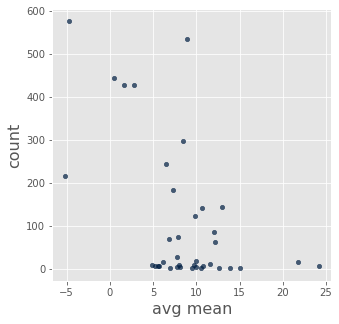

In [63]:
country_medals.scatter('avg mean','count')

In [65]:
country_athletes = athletes.group("Team")
country_athletes

Team,count
Albania,7
Algeria,12
American Samoa,2
Andorra,116
Argentina,370
Argentina-1,7
Argentina-2,7
Armenia,47
Australia,537
Australia-1,5


In [66]:
country_athletes=country_athletes.join('Team',Country_avg_temp,'country')
country_athletes

Team,count,avg mean
Albania,7,12.8735
Algeria,12,23.2553
American Samoa,2,26.7148
Andorra,116,11.4572
Argentina,370,14.817
Armenia,47,8.88457
Australia,537,21.7378
Austria,1954,6.48682
Azerbaijan,18,11.5065
Belarus,541,6.14321


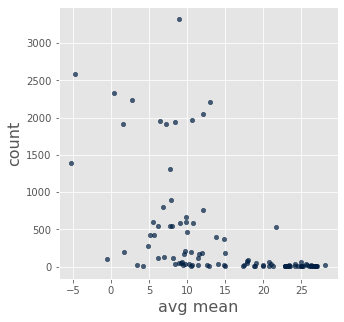

In [67]:
country_athletes.scatter('avg mean','count')

In [106]:
country_medals=country_medals.join('Team',Country_avg_temp,'country')
country_medals.sort('count')

Team,count,avg mean,avg mean_2,avg mean_3,avg mean_4
Nepal,1,15.048,15.048,15.048,15.048
New Zealand,1,10.5194,10.5194,10.5194,10.5194
Uzbekistan,1,12.5633,12.5633,12.5633,12.5633
Luxembourg,2,9.46703,9.46703,9.46703,9.46703
North Korea,2,6.9749,6.9749,6.9749,6.9749
Spain,2,13.8479,13.8479,13.8479,13.8479
Hungary,4,9.98532,9.98532,9.98532,9.98532
Denmark,5,8.15208,8.15208,8.15208,8.15208
Slovakia,5,7.80308,7.80308,7.80308,7.80308
Bulgaria,6,10.7529,10.7529,10.7529,10.7529


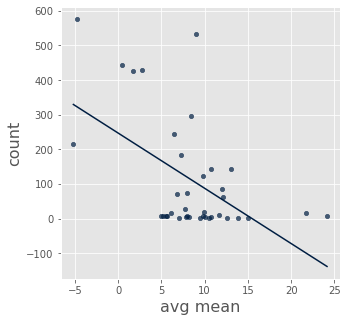

In [105]:
country_medals.scatter('avg mean','count', fit_line=True)

## Per population may be more informative

In [71]:
pop = Table().read_table("Country_population.csv",skiprows=3)
pop=pop.select("Country Name",'2000')
pop


In [74]:
country_athletes=country_athletes.join('Team',pop,'Country Name')
country_athletes

Team,count,avg mean,2000
Albania,7,12.8735,3.08903e+06
Algeria,12,23.2553,3.07746e+07
American Samoa,2,26.7148,58230
Andorra,116,11.4572,66097
Argentina,370,14.817,3.70708e+07
Armenia,47,8.88457,3.16852e+06
Australia,537,21.7378,1.90288e+07
Austria,1954,6.48682,8.01157e+06
Azerbaijan,18,11.5065,8.0486e+06
Belarus,541,6.14321,9.97961e+06


In [78]:
country_athletes=country_athletes.with_column("athlete per million",country_athletes['count']/(country_athletes['2000']/1e6))

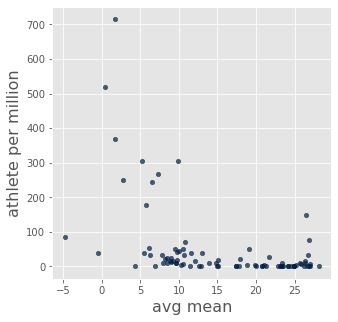

In [82]:
country_athletes.where("athlete per million",are.below(1000)).scatter('avg mean','athlete per million')

In [80]:
country_athletes.sort("athlete per million", descending=True)

Team,count,avg mean,2000,athlete per million
Liechtenstein,276,4.92971,33026,8357.05
Monaco,57,9.29817,32465,1755.74
Andorra,116,11.4572,66097,1755
San Marino,37,14.0999,26823,1379.41
Iceland,201,1.76946,281205,714.781
Norway,2328,0.460607,4.49097e+06,518.374
Finland,1909,1.65448,5.17621e+06,368.803
Estonia,425,5.19418,1.39698e+06,304.227
Slovenia,604,9.92138,1.98892e+06,303.682
Switzerland,1911,7.27769,7.18425e+06,265.999


In [19]:
temp_pivot = temp.select('year', 'country', 'avg').where('year',are.above(1900)).pivot('country', 'year', 'avg', sum)

In [21]:
temp_p2 = temp.select('year', 'country', 'avg').where('year',are.above(1899)).pivot('year', 'country', 'avg', sum)
temp_p2

country,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Afghanistan,13.7493,13.894,14.5058,12.9864,13.8058,13.3857,13.8849,13.3529,13.6992,13.9254,13.2165,13.385,13.9027,13.8592,14.2968,14.9146,13.343,13.9165,13.4833,13.8809,13.0365,14.1716,14.2555,13.3389,13.629,13.9317,13.7453,13.8446,13.633,13.4818,13.3306,13.4475,13.6647,13.8829,13.3414,13.2963,14.0074,13.5716,14.2112,14.1619,14.734,15.5027,14.4512,13.7078,14.2918,13.8663,14.5947,15.0351,14.3353,13.3501,13.0435,13.9678,14.1754,14.6508,13.6913,14.6426,14.1911,12.7772,14.7168,14.1526,13.9854,14.0649,13.7687,15.0334,13.0849,14.1018,14.343,13.6633,13.7623,13.8051,14.7831,14.8235,12.5472,14.2355,13.3168,13.5481,13.7086,14.8054,14.3297,14.2621,14.8873,14.8601,13.7331,14.6148,14.2458,14.8887,14.2232,14.984,15.389,14.1258,14.9933,14.3707,14.0561,14.4392,14.7547,14.8592,14.426,14.904,15.1325,15.3888,15.4978,15.7781,15.5377,14.916,15.7709,14.98,15.5956,15.1062,15.2165,15.2577,15.8287,15.518,14.4816
Africa,23.9915,24.0814,23.9019,23.6839,23.3301,23.7097,23.6368,23.3766,23.6649,23.6989,23.6129,23.5918,23.8933,23.9806,24.2567,24.1743,23.8496,23.6955,23.6654,24.089,23.8028,23.8998,23.9624,23.8529,24.1816,23.9439,24.2536,24.1898,24.2169,23.9718,24.0992,24.5448,24.1678,24.2034,24.0421,24.0302,24.0678,24.2497,24.0989,24.0466,24.2618,24.6307,24.4472,24.0093,24.2237,24.1642,24.185,24.3992,24.0078,24.1797,23.8808,24.1283,24.2759,24.0936,23.9423,24.1578,23.8497,24.0824,24.4148,24.167,24.3051,24.0285,24.1945,24.2667,23.9937,23.9676,24.3018,23.931,24.0117,24.5548,24.3216,23.9331,24.1991,24.4001,23.8304,23.9198,23.9119,24.2743,24.2222,24.4984,24.4467,24.2974,24.2116,24.5794,24.3872,24.3398,24.3094,24.922,24.5683,24.2238,24.7037,24.4222,24.3354,24.5387,24.4387,24.7184,24.6345,24.7068,25.0205,24.7437,24.5881,24.8412,24.9613,25.0256,24.8959,25.1562,24.8189,24.8515,24.7547,25.0265,25.4725,24.7865,24.7259
Albania,13.0686,12.4496,12.4827,12.5438,12.5293,12.1638,12.1798,12.2237,12.2472,12.5598,12.6648,12.4836,12.0578,12.3522,12.0158,12.6904,13.5502,12.6842,12.7312,12.3205,12.6975,12.511,12.6705,13.3133,12.552,12.6907,13.2525,13.6184,12.8971,12.023,13.2068,12.6615,12.5837,12.0106,13.524,12.9428,13.1183,13.2537,12.6143,13.0578,11.5825,12.0556,12.306,13.1973,12.4474,12.9446,13.4725,13.3954,12.7539,12.5183,13.8128,13.5698,13.5739,12.5863,12.4501,13.1481,12.1723,13.0784,13.1945,12.4056,13.3351,13.3168,13.0687,13.0858,12.5153,12.3784,13.2046,12.6218,12.8696,12.8029,12.8397,12.5344,12.6082,12.4867,12.5598,12.5684,12.0363,13.2233,12.2636,12.9892,12.1621,12.5787,13.0153,12.5109,12.6408,12.9482,13.0564,12.9966,13.0441,12.8038,13.4687,12.3388,13.0847,13.1226,14.0997,12.7821,12.7365,12.9009,13.3113,13.6538,13.7466,13.6904,13.5599,13.6266,13.2582,12.7471,12.9769,13.8905,13.9552,13.8443,13.7754,13.4433,13.7683
Algeria,22.8642,22.7264,23.0524,22.5557,22.6823,22.5601,22.4686,22.1716,22.8296,22.5698,22.6769,22.5747,22.8667,23.0792,23.0432,22.8212,22.643,22.4612,22.4113,22.7733,23.0943,22.7236,22.9345,22.4357,23.4181,22.7266,23.5017,23.3354,23.1154,22.6721,23.4545,23.8658,23.6169,23.1685,22.7447,22.9198,22.9409,23.7275,22.7277,22.8414,23.0059,23.4434,23.6102,23.0333,22.9342,23.3655,23.2543,23.6902,23.0713,23.1882,22.7818,23.3217,23.1854,22.8694,22.6524,24.0048,22.6113,22.6202,23.5449,23.3337,23.5041,23.3903,23.1824,23.3178,23.1475,22.9737,23.3013,22.8617,23.1859,23.4583,23.3228,22.6722,22.6982,22.8862,22.541,22.7164,22.3568,23.5461,23.1618,23.3968,23.1602,23.5793,23.0942,23.683,23.0631,23.5263,23.2567,24.2477,23.8

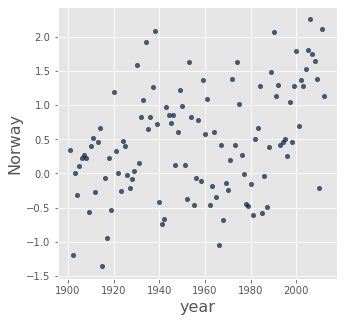

In [23]:
temp_pivot.scatter('year','Norway')

In [13]:
temp_pivot.to_csv("Country_temp_trend.csv")

In [24]:
import numpy as np

In [25]:
temp_p2.group("country",np.mean)

country,1900 mean,1901 mean,1902 mean,1903 mean,1904 mean,1905 mean,1906 mean,1907 mean,1908 mean,1909 mean,1910 mean,1911 mean,1912 mean,1913 mean,1914 mean,1915 mean,1916 mean,1917 mean,1918 mean,1919 mean,1920 mean,1921 mean,1922 mean,1923 mean,1924 mean,1925 mean,1926 mean,1927 mean,1928 mean,1929 mean,1930 mean,1931 mean,1932 mean,1933 mean,1934 mean,1935 mean,1936 mean,1937 mean,1938 mean,1939 mean,1940 mean,1941 mean,1942 mean,1943 mean,1944 mean,1945 mean,1946 mean,1947 mean,1948 mean,1949 mean,1950 mean,1951 mean,1952 mean,1953 mean,1954 mean,1955 mean,1956 mean,1957 mean,1958 mean,1959 mean,1960 mean,1961 mean,1962 mean,1963 mean,1964 mean,1965 mean,1966 mean,1967 mean,1968 mean,1969 mean,1970 mean,1971 mean,1972 mean,1973 mean,1974 mean,1975 mean,1976 mean,1977 mean,1978 mean,1979 mean,1980 mean,1981 mean,1982 mean,1983 mean,1984 mean,1985 mean,1986 mean,1987 mean,1988 mean,1989 mean,1990 mean,1991 mean,1992 mean,1993 mean,1994 mean,1995 mean,1996 mean,1997 mean,1998 mean,1999 mean,2000 mean,2001 mean,2002 mean,2003 mean,2004 mean,2005 mean,2006 mean,2007 mean,2008 mean,2009 mean,2010 mean,2011 mean,2012 mean
Afghanistan,13.7493,13.894,14.5058,12.9864,13.8058,13.3857,13.8849,13.3529,13.6992,13.9254,13.2165,13.385,13.9027,13.8592,14.2968,14.9146,13.343,13.9165,13.4833,13.8809,13.0365,14.1716,14.2555,13.3389,13.629,13.9317,13.7453,13.8446,13.633,13.4818,13.3306,13.4475,13.6647,13.8829,13.3414,13.2963,14.0074,13.5716,14.2112,14.1619,14.734,15.5027,14.4512,13.7078,14.2918,13.8663,14.5947,15.0351,14.3353,13.3501,13.0435,13.9678,14.1754,14.6508,13.6913,14.6426,14.1911,12.7772,14.7168,14.1526,13.9854,14.0649,13.7687,15.0334,13.0849,14.1018,14.343,13.6633,13.7623,13.8051,14.7831,14.8235,12.5472,14.2355,13.3168,13.5481,13.7086,14.8054,14.3297,14.2621,14.8873,14.8601,13.7331,14.6148,14.2458,14.8887,14.2232,14.984,15.389,14.1258,14.9933,14.3707,14.0561,14.4392,14.7547,14.8592,14.426,14.904,15.1325,15.3888,15.4978,15.7781,15.5377,14.916,15.7709,14.98,15.5956,15.1062,15.2165,15.2577,15.8287,15.518,14.4816
Africa,23.9915,24.0814,23.9019,23.6839,23.3301,23.7097,23.6368,23.3766,23.6649,23.6989,23.6129,23.5918,23.8933,23.9806,24.2567,24.1743,23.8496,23.6955,23.6654,24.089,23.8028,23.8998,23.9624,23.8529,24.1816,23.9439,24.2536,24.1898,24.2169,23.9718,24.0992,24.5448,24.1678,24.2034,24.0421,24.0302,24.0678,24.2497,24.0989,24.0466,24.2618,24.6307,24.4472,24.0093,24.2237,24.1642,24.185,24.3992,24.0078,24.1797,23.8808,24.1283,24.2759,24.0936,23.9423,24.1578,23.8497,24.0824,24.4148,24.167,24.3051,24.0285,24.1945,24.2667,23.9937,23.9676,24.3018,23.931,24.0117,24.5548,24.3216,23.9331,24.1991,24.4001,23.8304,23.9198,23.9119,24.2743,24.2222,24.4984,24.4467,24.2974,24.2116,24.5794,24.3872,24.3398,24.3094,24.922,24.5683,24.2238,24.7037,24.4222,24.3354,24.5387,24.4387,24.7184,24.6345,24.7068,25.0205,24.7437,24.5881,24.8412,24.9613,25.0256,24.8959,25.1562,24.8189,24.8515,24.7547,25.0265,25.4725,24.7865,24.7259
Albania,13.0686,12.4496,12.4827,12.5438,12.5293,12.1638,12.1798,12.2237,12.2472,12.5598,12.6648,12.4836,12.0578,12.3522,12.0158,12.6904,13.5502,12.6842,12.7312,12.3205,12.6975,12.511,12.6705,13.3133,12.552,12.6907,13.2525,13.6184,12.8971,12.023,13.2068,12.6615,12.5837,12.0106,13.524,12.9428,13.1183,13.2537,12.6143,13.0578,11.5825,12.0556,12.306,13.1973,12.4474,12.9446,13.4725,13.3954,12.7539,12.5183,13.8128,13.5698,13.5739,12.5863,12.4501,13.1481,12.1723,13.0784,13.1945,12.4056,13.3351,13.3168,13.0687,13.0858,12.5153,12.3784,13.2046,12.6218,12.8696,12.8029,12.8397,12.5344,12.6082,12.4867,12.5598,12.5684,12.0363,13.2233,12.2636,12.9892,12.1621,12.5787,13.0153,12.5109,12.6408,12.9482,13.0564,12.9966,13.0441,12.8038,13.4687,12.3388,13.0847,13.1226,14.0997,12.7821,12.7365,12.9009,13.3113,13.6538,13.7466,13.6904,13.5599,13.6266,13.2582,12.7471,12.9769,13.8905,13.9552,13.8443,13.7754,13.4433,13.7683
Algeria,22.8642,22.7264,23.0524,22.5557,22.6823,22.5601,22.4686,22.1716,22.8296,22.5698,22.6769,22.5747,22.8667,23.0792,23.0432,22.8212,22.643,22.46

Denmark must include Greenland

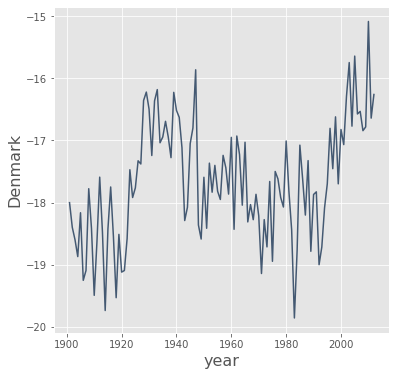

In [42]:
temp_pivot.plot('year','Denmark')

### Highest Peak: Countries with high mountains will have more winter athletes

In [93]:
peaks = Table().read_table("country_peaks.csv")
peaks.sort("meters",descending=True)

Country or Region,meters,Highest Point
China,8848,Mount Everest
Nepal,8848,Mount Everest
Pakistan,8611,K2
India,8586,Kangchenjunga
Bhutan,7570,Gangkhar Puensum
Tajikistan,7495,Ismoil Somoni Peak
Afghanistan,7492,Noshakh
Kyrgyzstan,7439,Jengish Chokusu
Kazakhstan,7010,Khan Tengri
Argentina,6960,Aconcagua


- Please keep and run the below last line when completed:

In [94]:
country_athletes=country_athletes.drop("meters", "meters_2", "meters_3")

In [95]:
country_athletes=country_athletes.join('Team',peaks,'Country or Region')
country_athletes.sort("athlete per million", descending=True)

Team,count,avg mean,2000,athlete per million,Highest Point,Highest Point_2,Highest Point_3,meters_4,Highest Point_4,meters,Highest Point_5
Liechtenstein,276,4.92971,33026,8357.05,Grauspitz,Grauspitz,Grauspitz,2599,Grauspitz,2599,Grauspitz
Monaco,57,9.29817,32465,1755.74,Chemin des Révoires on Mont Agel,Chemin des Révoires on Mont Agel,Chemin des Révoires on Mont Agel,161,Chemin des Révoires on Mont Agel,161,Chemin des Révoires on Mont Agel
Andorra,116,11.4572,66097,1755,Coma Pedrosa,Coma Pedrosa,Coma Pedrosa,2942,Coma Pedrosa,2942,Coma Pedrosa
San Marino,37,14.0999,26823,1379.41,Monte Titano,Monte Titano,Monte Titano,739,Monte Titano,739,Monte Titano
Iceland,201,1.76946,281205,714.781,Hvannadalshnúkur,Hvannadalshnúkur,Hvannadalshnúkur,2110,Hvannadalshnúkur,2110,Hvannadalshnúkur
Norway,2328,0.460607,4.49097e+06,518.374,Galdhøpiggen,Galdhøpiggen,Galdhøpiggen,2469,Galdhøpiggen,2469,Galdhøpiggen
Finland,1909,1.65448,5.17621e+06,368.803,Halti,Halti,Halti,1324,Halti,1324,Halti
Estonia,425,5.19418,1.39698e+06,304.227,Suur Munamägi,Suur Munamägi,Suur Munamägi,318,Suur Munamägi,318,Suur Munamägi
Slovenia,604,9.92138,1.98892e+06,303.682,Triglav,Triglav,Triglav,2864,Triglav,2864,Triglav
Switzerland,1911,7.27769,7.18425e+06,265.999,Dufourspitze,Dufourspitze,Dufourspitze,4634,Dufourspitze,4634,Dufourspitze


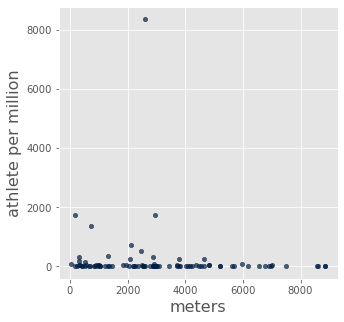

In [96]:
country_athletes.scatter("meters","athlete per million")

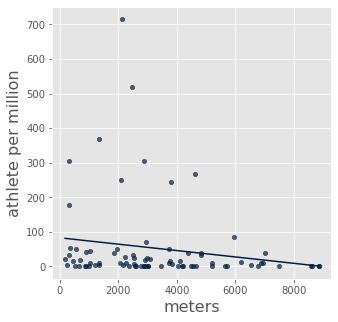

In [102]:
country_athletes.where('2000',are.above(200000)).scatter("meters","athlete per million",fit_line=True)

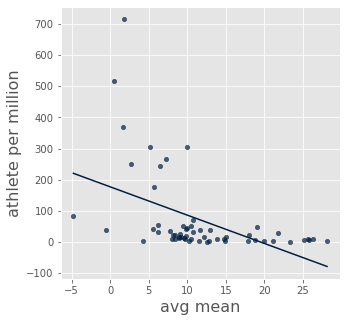

In [101]:
country_athletes.where("athlete per million",are.above(1)).where('2000',are.above(200000)).scatter("avg mean","athlete per million",fit_line=True)

In [ ]:
print("Nice work ", user)
import time;
localtime = time.asctime( time.localtime(time.time()) )
print("Submitted @ ", localtime)